In [8]:
import numpy as np
import importlib 
import import_standardize
importlib.reload(import_standardize)
from import_standardize import *
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Conv1D,Conv2D,MaxPooling1D,Flatten,Dense,Dropout,BatchNormalization, GRU, LSTM, RNN
from keras import regularizers as reg

from IPython.display import SVG
from keras.utils.vis_utils import plot_model

In [9]:
def cnn(conv_layers=3,conv_sizes=(64,128,256),filter_size=3, fc_layers=2,fc_sizes=(4096,2048),
        dropout=0.5,pool_size=2,init='he_uniform',act='relu',optim='adam',pool=True,
        reg = reg.l2(0.05), epochs=10, batch_size=64):

    classifier = Sequential()
    for i in range(conv_layers):
        classifier.add(Conv1D(conv_sizes[i], filter_size, input_shape = X_train.shape[1:],
                              activation = act,kernel_initializer=init,kernel_regularizer=reg))
        classifier.add(BatchNormalization())
        if pool:
            classifier.add(MaxPooling1D(pool_size = 2))
    classifier.add(Flatten())
    for j in range(fc_layers):
        classifier.add(Dense(fc_sizes[j], activation = act,kernel_initializer=init,kernel_regularizer=reg))
        classifier.add(Dropout(dropout))
    classifier.add(Dense(4, activation = 'softmax',kernel_initializer=init))
    classifier.compile(optimizer = optim, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    classifier.summary()
    classifier.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [10]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=3,conv_sizes=(32,32,32),fc_layers=2,fc_sizes=(512,256), batch_size=64, epochs=20)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 998, 32)           2144      
_________________________________________________________________
batch_normalization_14 (Batc (None, 998, 32)           128       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 499, 32)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 497, 32)           3104      
_________________________________________________________________
batch_normalization_15 (Batc (None, 497, 32)           128       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 248, 32)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 246, 32)          

In [11]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn(conv_layers=3,conv_sizes=(32,32,32),fc_layers=2,fc_sizes=(512,256), batch_size=128)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 998, 32)           2144      
_________________________________________________________________
batch_normalization_17 (Batc (None, 998, 32)           128       
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 499, 32)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 497, 32)           3104      
_________________________________________________________________
batch_normalization_18 (Batc (None, 497, 32)           128       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 248, 32)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 246, 32)          

In [12]:
import matplotlib.pyplot as plt
def cnn_plot(conv_layers=3,conv_sizes=(64,128,256),filter_size=3, fc_layers=2,fc_sizes=(4096,2048),
        dropout=0.5,pool_size=2,init='he_uniform',act='relu',optim='adam',pool=True,
        reg = reg.l2(0.05),epochs=10, batch_size=64):

    classifier = Sequential()
    for i in range(conv_layers):
        classifier.add(Conv1D(conv_sizes[i], filter_size, input_shape = X_train.shape[1:],
                              activation = act,kernel_initializer=init,kernel_regularizer=reg))
        classifier.add(BatchNormalization())
        if pool:
            classifier.add(MaxPooling1D(pool_size = 2))
    classifier.add(Flatten())
    for j in range(fc_layers):
        classifier.add(Dense(fc_sizes[j], activation = act,kernel_initializer=init,kernel_regularizer=reg))
        classifier.add(Dropout(dropout))
    classifier.add(Dense(4, activation = 'softmax',kernel_initializer=init))
    classifier.compile(optimizer = optim, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    print(f'Train on {len(X_train)} samples & Evaluate on {len(X_test)} samples')
    classifier.summary()
    plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    history = classifier.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size, verbose=1)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Train on 2308 samples & Evaluate on 250 samples
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 998, 32)           2144      
_________________________________________________________________
batch_normalization_32 (Batc (None, 998, 32)           128       
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 499, 32)           0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 497, 32)           3104      
_________________________________________________________________
batch_normalization_33 (Batc (None, 497, 32)           128       
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 248, 32)           0         
_________________________________________________________________
conv1d

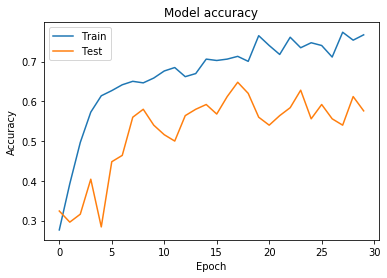

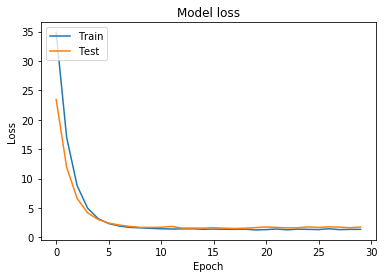

In [16]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_total(X, y)
cnn_plot(conv_layers=4, conv_sizes=(32,32,32,32),fc_layers=2,fc_sizes=(64, 32),
         batch_size=32, epochs=30, dropout=0.2, reg=reg.l2(0.1))

Train on 234 samples & Evaluate on 50 samples
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 998, 16)           1072      
_________________________________________________________________
batch_normalization_36 (Batc (None, 998, 16)           64        
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 499, 16)           0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 497, 16)           784       
_________________________________________________________________
batch_normalization_37 (Batc (None, 497, 16)           64        
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 248, 16)           0         
_________________________________________________________________
conv1d_

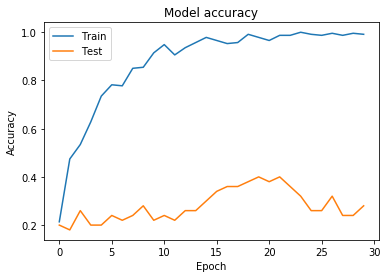

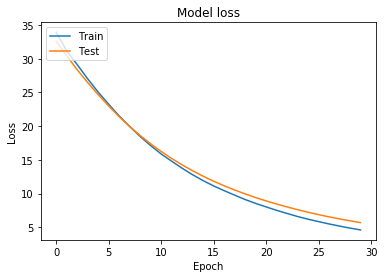

In [17]:
X, y = import_data(every=False)
X_train,X_test,y_train,y_test = train_test_subject(X, y, subject=3)
cnn_plot(conv_layers=4, conv_sizes=(16,16,16,16),fc_layers=2,fc_sizes=(64, 32),
         batch_size=32, epochs=30, dropout=0.2, reg=reg.l2(0.1))